In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
amt_income_total_mean = app_train['AMT_INCOME_TOTAL'].mean()
amt_income_total_var = app_train['AMT_INCOME_TOTAL'].var()
print("amt_income_total_mean = ",amt_income_total_mean)
print("amt_income_total_var = ",amt_income_total_var)

amt_income_total_mean =  168797.9192969845
amt_income_total_var =  56227386501.174484


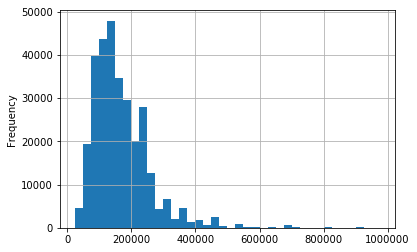

In [5]:
app_train['AMT_INCOME_TOTAL'].describe()
app_train['AMT_INCOME_TOTAL'].plot(kind='hist',grid=True,bins=range(25000,1000000,25000))

# 課後練習

## Panda DataFrame 的統計功能

In [6]:
import pandas as pd
columns = ['name','age','preTestScore','postTestScore']
nameList = ['Jason', 'Molly', 'Tina', 'Jake', 'Amy']
ageList = [42, 52, 36, 24, 73];
preTestScoreList = [4, 24, 31, 2, 3];
postTestScoreLis = [25, 94, 57, 62, 70]
dataList = [nameList,ageList,preTestScoreList,postTestScoreLis]
if len(columns) != len(dataList):
    #print(len(columns),"!=",len(dataList))
    print("the size of \"columns\" must be equal to the size of \"dataList\"",len(columns),"!=",len(dataList))

data = {columns[i]:dataList[i] for i in range(len(columns))}
#[print (item) for item in columns]

#for dataitem in dataList:
#    print (dataitem)

# data2 = {'name':['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
#         'age':[42, 52, 36, 24, 73],
#         'preTestScore':[4, 24, 31, 2, 3],
#         'postTestScore':[25, 94, 57, 62, 70]}
df = pd.DataFrame(data,columns=list(data.keys()))

print('age.sum = ',df['age'].sum())
print('age.mean = ',df['age'].mean())
print('preTestScore.mean = ',df['preTestScore'].mean())
print('preTestScore.cumsum = \n',df['preTestScore'].cumsum())
print('postTestScore.max = ',df['postTestScore'].max())
print('postTestScore.min = ',df['postTestScore'].min())
print('postTestScore.median = ',df['postTestScore'].median())
print('postTestScore.var = ',df['postTestScore'].var())
print('postTestScore.std = ',df['postTestScore'].std())
print('postTestScore.skew = ',df['postTestScore'].skew())
print('postTestScore.kurt = ',df['postTestScore'].kurt())
print('name.count = ',df['name'].count())
print('\ncorrelation:')
print(df.corr())
print('\ncovariance:')
print(df.cov())

age.sum =  227
age.mean =  45.4
preTestScore.mean =  12.8
preTestScore.cumsum = 
 0     4
1    28
2    59
3    61
4    64
Name: preTestScore, dtype: int64
postTestScore.max =  94
postTestScore.min =  25
postTestScore.median =  62.0
postTestScore.var =  620.3
postTestScore.std =  24.90582261239327
postTestScore.skew =  -0.391615507734
postTestScore.kurt =  1.42715055034
name.count =  5

correlation:
                    age  preTestScore  postTestScore
age            1.000000     -0.105651       0.328852
preTestScore  -0.105651      1.000000       0.378039
postTestScore  0.328852      0.378039       1.000000

covariance:
                  age  preTestScore  postTestScore
age            340.80        -26.65         151.20
preTestScore   -26.65        186.70         128.65
postTestScore  151.20        128.65         620.30


In [7]:
df['age'].describe()

count     5.000000
mean     45.400000
std      18.460769
min      24.000000
25%      36.000000
50%      42.000000
75%      52.000000
max      73.000000
Name: age, dtype: float64

In [8]:
df['preTestScore'].describe()

count     5.000000
mean     12.800000
std      13.663821
min       2.000000
25%       3.000000
50%       4.000000
75%      24.000000
max      31.000000
Name: preTestScore, dtype: float64

In [9]:
df['postTestScore'].describe()

count     5.000000
mean     61.600000
std      24.905823
min      25.000000
25%      57.000000
50%      62.000000
75%      70.000000
max      94.000000
Name: postTestScore, dtype: float64

In [10]:
data2 = data
data2['improve'] = [data2['postTestScore'][i]-data2['preTestScore'][i] for i in range(len(data2['postTestScore']))]
df2 = pd.DataFrame(data2,columns=list(data2.keys()))

#df2.iloc[df2['improve'].idxmax()]['name']
df2.iloc[df2['improve'].idxmax()]
print("The person who improved the most:",df2.iloc[df2['improve'].idxmax()]['name']+
      ", improved from",df2.iloc[df2['improve'].idxmax()]['preTestScore'],"to",
      df2.iloc[df2['improve'].idxmax()]['postTestScore'])

The person who improved the most: Molly, improved from 24 to 94


In [11]:
df2['improve'].describe()

count     5.000000
mean     48.800000
std      23.445682
min      21.000000
25%      26.000000
50%      60.000000
75%      67.000000
max      70.000000
Name: improve, dtype: float64

### Skewness和Kurtosis的說明
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

### Creating Histograms using Pandas
https://community.modeanalytics.com/gallery/python_histogram/